# Mini-projet: calcul des forces de pression sur une digue

Une digue est un petit barrage permettant de retenir une étendue d'eau (mer, lac, rivière) par exemple pour protéger des habitations ou des installations en zone inondable. 

Dans ce mini-projet vous allez calculer numériquement les forces appliquées à une digue de forme arbitraire.

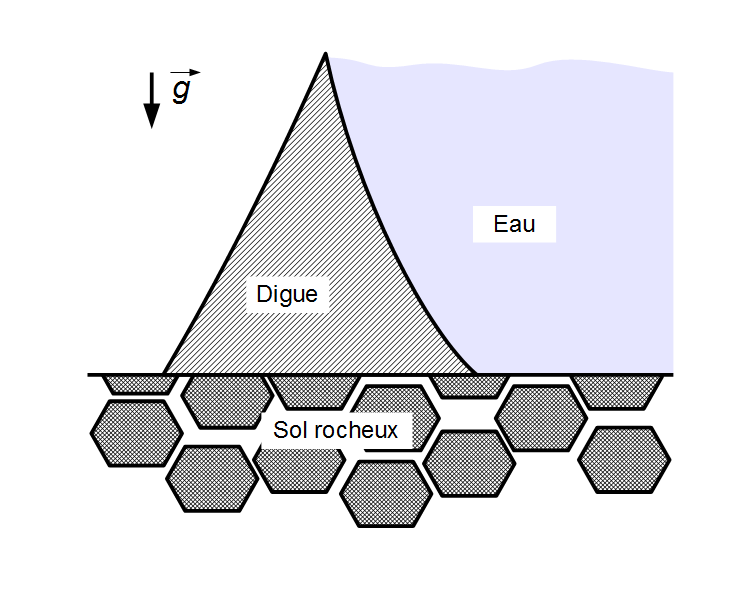

## Travail à la maison

La digue que nous allons modéliser est un bloc de béton (masse volumique : 3000 kg/m$^3$) posé sur le sol rocheux (coefficient de friction statique béton - roche : 0.5). D'un côté la digue retiens une masse d'eau de hauteur $H$, l'autre coté étant exposé à l'air. On prendra $H=10$ m dans toute la suite. 

Nous ferons l'hypothèse que l'interface entre le sol et la digue est étanche à l'eau mais pas à l'air. Cette hypothèse permettra de simplifier le calcul en ne considérant que les forces de pression due à la hauteur d'eau.

Pour simplifier, on se placera en deux dimensions (la digue est de longueur unitaire suivant l'axe perpendiculaire au schéma ci-dessus et on ne considérera pas les bords suivant cette direction).

a. Faites un bilan des forces appliquées à la digue en 2D. Quelle force permet à la digue de ne pas glisser sur le sol rocheux ?

##Réponse

- Force du poids
- Force de pression de l'air
- Force de pression de l'eau
- Force de frottement digue/sol (permet à la digue de ne pas glisser)


b. Rappelez l'expression de la pression hydrostatique dans l'eau $P_{eau} (x)$ en fonction de la hauteur par rapport au sol $x$.

##Réponse

$P_{eau} (x) = \rho_e g (H-x) + P_0 $

c. Justifiez que nous pouvons considérer dans l'expression précédente que la constante est la contribution de la pression de l'air. Considérons pour l'instant que le barrage est à sec, que pourrions nous dire sur la résultante des forces de pression de l'air sur la digue ? Rappelons ici que l'air peut s'imiscer entre la digue et le sol (indice : que peux-t-on dire de la poussée d'archimède de l'air sur un bloc de béton). Ce résultat est-il modifié si le barrage retiens une hauteur d'eau ? En déduire que l'on peux se réduire à calculer seulement les forces de pression de l'eau en utilisant l'expression $P_{eau} (x) = \rho_e g (H-x)$


##Réponse

La pression de l'air appuie sur la surface de l'eau qui répercute cette pression en profondeur. On peut donc modéliser le phénomène en distinguant une force de pression qui ne vient que de la hauteur d'eau et une force de pression qui vient de la pression de l'air au dessus de la surface. 

La pression de l'air étant homogène sur la hauteur $H$, on aurait la même pression de l'air si le barrage était à sec. Dans ce cas on peut dire que la résultante des forces de pressions est négligeable devant le poids du barrage car l'air a une masse volumique négligeable devant celle du béton (i.e.: la poussée d'Archimède de l'air sur un bloc de béton est négligeable). Notons que le fait que l'air puisse passer sous le barrage est important, sinon l'air appuie en plus sur le barrage par effet ventouse.

Le point précédent ne change pas si le barrage retiens de l'eau. Ainsi, on peut faire le calcul en séparant la pression venant de la hauteur d'eau et de la pression atmosphérique, cette dernière étant compansée dans la résultante des forces de pression atmosphérique sur la digue.

d. Rappelez la (les) équation(s) d'équilibre statique de la digue.

##Réponse

équilibre translationnel : dans un référentiel Galiléen la somme des forces est nulle.

équilibre rotationnel : dans un référentiel Galiléen la somme des moments des forces par rapport à un point fixe est nulle.

### Modélisation

Pour considérer une digue de forme arbitraire, on modélisera les pentes coté air et coté eau par des fonctions mathématiques. Dans ce projet nous allons intégrer des fonctions suivant la direction donnée par l'axe vertical $y$. Il sera donc plus pratique de définir les pentes de la digue comme étant $x$ en fonction de $y$ (schéma ci-dessous).

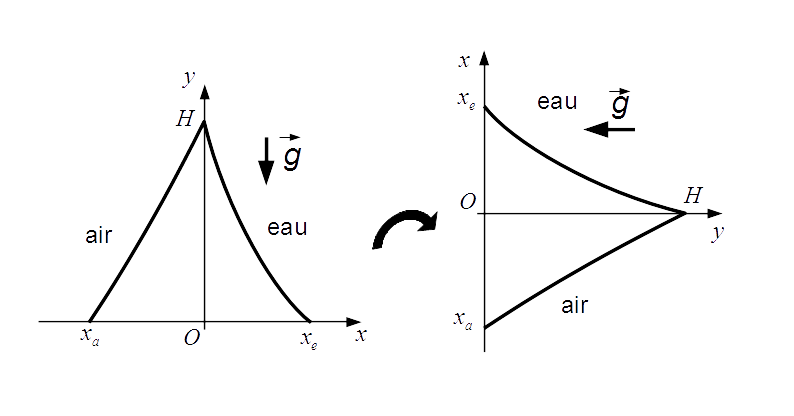


On définit donc :

* une fonction croissante $f_{air}(y)$ représentant l'interface air-béton définie pour $0 \leq y \leq H$ et allant de $x_a$ à $0$,
* une autre fonction décroissante $f_{eau}(y)$ représentant l'interface eau-béton définie sur le même intervalle et allant de $x_e$ à $0$. 

On ne considérera ici que des fonctions monotones.

On donne l'expression de la courbe coté eau pour une digue représentée par une fonction affine :

$$
f_{air}(y) = -\frac{x_a}{H}.(y-H)
$$

e. Donnez l'expression de la fonction coté air dans le cas d'une fonction affine, et tracez la avec le code suivant.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

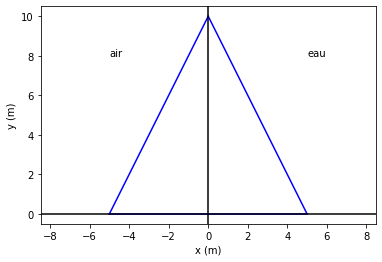

In [2]:
# ce code permet d'afficher les courbes représentant la digue

H=10
xa=-5
xe=+5


# on définit les fonctions coté eau et coté air, ici les courbes concaves
def fair(y):
    return -(y-H)*xa/H

def feau(y):
    return -(y-H)*xe/H  ## A remplir

# on crée un tableau de y
y=np.linspace(0,H,1000)

# on trace
plt.plot(fair(y),y,'-b') 
plt.plot(feau(y),y,'-b')  ## Décommenter après avoir codé la fonction feau(x)
 
plt.plot([xe,xa],[0,0],'-b') # bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe,8,'eau')
plt.text(xa,8,'air')
plt.axis('equal') # permet d'avoir un plot isométrique
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(-8,8)
plt.show()

## Travail en séance

On rappelle que les forces de pressions s'exercent perpendiculairement à la surface d'application. Il faut donc pouvoir trouver un vecteur normal à la tangente de ces deux fonctions en tout point, qui sera le vecteur directeur de la force de pression locale.

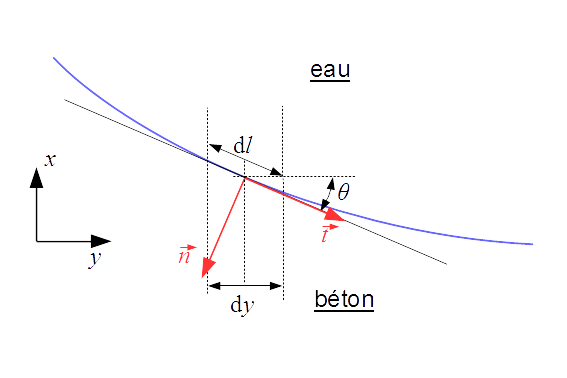

On rappelle que l'angle $\theta$ entre la tangente en un point et l'axe des abscisses (voir schéma ci-dessus) est relié à la dérivée de la courbe par :
$$
tan(\theta) = f'(y)
$$

Les vecteurs $\vec t$ et $\vec n$ sont alors donnés par :
$$
\vec t = \cos(\theta).\vec{u_y} + \sin(\theta).\vec{u_x}
$$
$$
\vec n = \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} 
$$


Pour pouvoir calculer la résultante des forces de pression sur une surface de forme arbitraire, il nous faut intégrer les forces infinitésimales $\vec{\mathrm{d}F}$ s'appliquant à chaque élément de surface $\mathrm{d}S$. Comme nous somme en deux dimensions, nous pouvons simplifier le problème en considérant que l'élément de surface est $\mathrm{d}S = L \mathrm{d}l$, avec $L = 1$ la longueur unitaire de la digue suivant $z$, ce qui nous ramène à une intégrale 1D (on n'écrira pas $L$ dans la suite).

On obtient donc, pour l'interfaces eau-béton :
$$
\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P(y) \mathrm{d}l . \vec{n}
$$

avec $\vec{n}$ le vecteur normal rentrant au point de coordonnées $(f(y),y)$, et $\mathrm{d}l$ la longueur infinitésimale de la courbe pour une variation $\mathrm{d}x$. On montre facilement la relation avec l'angle $\theta$ définit avant :

$$
\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}
$$

### Cas des digues en pentes droites

a. Calculez le volume de la digue par intégration de la largeur de la digue en fonction de $y$. Comparez avec le calcul analytique (ici, l'aire du triangle multiplié par la longueur $L=1$). En déduire la force de gravité exercée sur la digue.

In [3]:
##Réponse

#on commence par définir les paramètres
H=10 #m
g=1 #SI

rhoeau=1000 #SI
rhobeton=3000 #SI


xe=5 #m
xa=-5 #m

#on définit les fonctions des pentes de la digue
def feau(y):
    return (H-y)*xe/H

def fair(y):
    return (H-y)*xa/H

#et leur dérivées
def feauprime(y):
    return -xe/H

def fairprime(y):
    return -xa/H

# on définit la plage d'intégration suivant y
y=np.linspace(0,H,1000)

#fonction intégration, méthode des trapèzes

def Inttrap(f,a,b,n):
    deltax = (b-a)/n
    output = 0
    for i in range(n):
        output = output + (f(a+i*deltax)+f(a+(i+1)*deltax))*deltax/2
    return output

#on definit la fonction largeur = largeur du abrrage a la hauteur y
def largeur(y):
    return (feau(y)-fair(y))

#calcul du volume
#nombre de poitns d'intégrations
n=1000
volumebeton=Inttrap(largeur,0,H,n)
print('Volume Intégré  \t',volumebeton)
print('Volume analytique\t',0.5*(xe-xa)*H)

#force de pesanteur
Poidx=0
Poidy=-rhobeton*volumebeton*g

print('Poids   \t',"{:7.1f}".format(Poidx),'ux\t',"{:7.1f}".format(Poidy),'uy')

Volume Intégré  	 49.999999999999986
Volume analytique	 50.0
Poids   	     0.0 ux	 -150000.0 uy


b. Pour le cas des fonctions affines, calculez la résultante (vectorielle ! il y a une composante suivant $x$ et une composante suivant $y$) des forces de pression coté eau. On prendra $x_a = -5$, $x_e = +5$, $H=10$. (On ne cherchera pas à faire le calcul analytique !)

In [4]:
##Réponse:

#on définit la fonction Pression hydrostatique en fonction de y
def Peau(y):
    return rhoeau*g*(H-y)

#on définit les fonctions dF à intégrer pour calculer les forces

#Pour le coté eau
#composante suivant x
def dForceeaux(y):
    theta=np.arctan(feauprime(y))
    return -Peau(y)*np.cos(theta)/np.cos(theta)
#compostante suivant y
def dForceeauy(y):
    theta=np.arctan(feauprime(y))
    return Peau(y)*np.sin(theta)/np.cos(theta)

# on fait les calculs pour xe=5 xa=-5


#calcul des forces

#nombre de poitns d'intégrations
n=1000

Forceeaux=Inttrap(dForceeaux,0,H,n)
Forceeauy=Inttrap(dForceeauy,0,H,n)

print('Force eau\t',"{:7.1f}".format(Forceeaux),'ux\t',"{:7.1f}".format(Forceeauy),'uy')

Force eau	 -50000.0 ux	 -25000.0 uy


c. En supposant que la digue est en équilibre statique translationnel, calculez avec le principe fondamental de la dynamique les deux composantes (normale et tangentielle) de la force de réaction du sol, puis le rapport de ces composantes $T/N$. En considérant le coefficient de frottement roche/béton de 0.5, la digue est-elle en équilibre translationnel ?

In [5]:
##Réponse

#Si la digue est en equilibre translationnel on a P+Feau+T+N = 0 

#one en déduit force de frottement statique en projetant sur x et y
T=-(Poidx+Forceeaux)
N=-(Poidy+Forceeauy)
rapport=np.abs(T/N)

print('Réaction\t',"{:7.1f}".format(T),'ux\t',"{:7.1f}".format(N),'uy')
print('T/N\t',"{:7.5f}".format(rapport))
print('Ici T/N < 0.5 donc la digue est en équilibre')

Réaction	 50000.0 ux	 175000.0 uy
T/N	 0.28571
Ici T/N < 0.5 donc la digue est en équilibre


d. Reprenez le calcul du rapport $T/N$ et du volume de béton en imposant $x_a=-5$ et $x_e=0$. La digue est-elle stable ? (il sera utile d'écrire une fonction résumant les calculs des questions a. b. c.).

Volume Intégré  	 24.999999999999993


résumé des forces :
Force eau	 -50000.0 ux	     0.0 uy
Poids   	     0.0 ux	 -75000.0 uy
Réaction	 50000.0 ux	 75000.0 uy


résumé des résultats:
Volume	 24.999999999999993
T/N	 0.66667


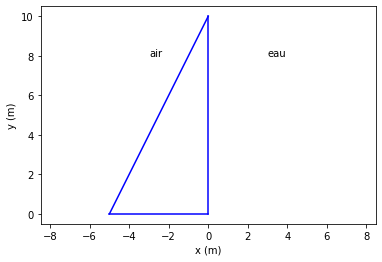

(24.999999999999993, 0.6666666666666669)
T/N>0.5 donc la digue n est pas stable !


In [6]:
##Réponse

#On écrit la fonction qui fait le calcul
def calculcomplet(show):
    #calcul des forces

    #nombre de poitns d'intégrations
    n=1000

    Forceeaux=Inttrap(dForceeaux,0,H,n)
    Forceeauy=Inttrap(dForceeauy,0,H,n)

    #calcul du volume
    volumebeton=Inttrap(largeur,0,H,n)

    #force de pesanteur
    Poidx=0
    Poidy=-rhobeton*volumebeton*g

    #force de frottement statique
    T=-(Poidx+Forceeaux)
    N=-(Poidy+Forceeauy)
    rapport=np.abs(T/N)
    if show==1:
        print('Volume Intégré  \t',volumebeton)
        print('\n')
        print('résumé des forces :')
        print('Force eau\t',"{:7.1f}".format(Forceeaux),'ux\t',"{:7.1f}".format(Forceeauy),'uy')
        print('Poids   \t',"{:7.1f}".format(Poidx),'ux\t',"{:7.1f}".format(Poidy),'uy')
        print('Réaction\t',"{:7.1f}".format(T),'ux\t',"{:7.1f}".format(N),'uy')
        print('\n')
        #résumé des résultats:
        print('résumé des résultats:')
        print('Volume\t',volumebeton)
        print('T/N\t',"{:7.5f}".format(rapport))

    
    if show==1:
        y=np.linspace(0,H,1000)
        plt.plot(feau(y),y,'-b')
        plt.plot(fair(y),y,'-b')
        plt.plot([xe,xa],[0,0],'-b')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.text(3,8,'eau')
        plt.text(-3,8,'air')        
        plt.axis('equal')
        #plt.axhline(0, color="black")
        #plt.axvline(0, color="black")
        plt.xlim(-8,8)
        plt.show()
    return volumebeton, rapport

#on change xe et xa
xe=0 #m
xa=-5 #m

#on redéfinit les fonctions utiles:

def feau(y):
    return (H-y)*xe/H

def fair(y):
    return (H-y)*xa/H

#et leur dérivées
def feauprime(y):
    return -xe/H

def fairprime(y):
    return -xa/H

#on fait le calcul
print(calculcomplet(1))
print('T/N>0.5 donc la digue n est pas stable !')

e. Reprenez le calcul avec $x_a=0$ et $x_e=+5$. Que constatez-vous ? Expliquez pourquoi la digue est stable dans un cas mais pas l'autre.

Volume Intégré  	 24.999999999999993


résumé des forces :
Force eau	 -50000.0 ux	 -25000.0 uy
Poids   	     0.0 ux	 -75000.0 uy
Réaction	 50000.0 ux	 100000.0 uy


résumé des résultats:
Volume	 24.999999999999993
T/N	 0.50000


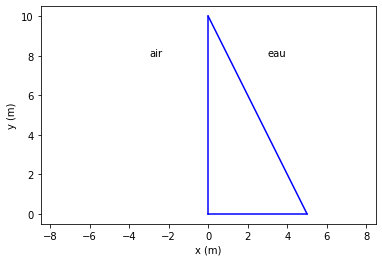

(24.999999999999993, 0.5000000000000001)

La digue est stable dans le cas xe>0 car la pression hydrostatique exerce une force verticale qui aide a plaquer la digue au sol. Ce n est pas le cas dans le cas ou la digue est droite coté eau et en pente coté air


In [7]:
##Réponse

#on change xe et xa
xe=5 #m
xa=0 #m

#on redéfinit les fonctions utiles:

def feau(y):
    return (H-y)*xe/H

def fair(y):
    return (H-y)*xa/H

#et leur dérivées
def feauprime(y):
    return -xe/H

def fairprime(y):
    return -xa/H

#on fait le calcul
print(calculcomplet(1))

print('\nLa digue est stable dans le cas xe>0 car la pression hydrostatique exerce une force verticale qui aide a plaquer la digue au sol. Ce n est pas le cas dans le cas ou la digue est droite coté eau et en pente coté air')

### Cas des digues convexes

On considère maintenant que l'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :
$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


on donne également la dérivée :

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

(on peut vérifier aisément que cette fonction relie bien les points de coordonées $[x_e,0]$ et $[0,H]$). Dans la suite nous prendrons $a=3$.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

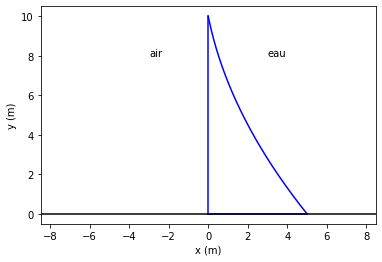

In [9]:
# ce code permet d'afficher les courbes représentant la digue

H=10
xe=5
xa=0

# on définit les fonctions coté eau et coté air, ici les courbes concaves
a=3
def feau(y):
    return a*(y/H)**2-(a+xe)*(y/H)+xe
def fair(y):
    return (H-y)*xa/H

# on crée un tableau de y
y=np.linspace(0,H,1000)

# on trace
plt.plot(feau(y),y,'-b')
plt.plot(fair(y),y,'-b')
plt.plot([xe,xa],[0,0],'-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3,8,'eau')
plt.text(-3,8,'air')
plt.axis('equal') # permet d'avoir un plot isométrique
plt.axhline(0, color="black")
#plt.axvline(0, color="black")
plt.xlim(-8,8)
plt.show()

e. Calculez, pour $a=3$, $x_a=0$ et $x_e=5$, la résultante des forces de pression, le volume de béton, et le rapport $T/N$ dans l'hypothèse de l'équilibre statique. La digue est-elle en équilibre translationnel ?

Volume Intégré  	 20.000005


résumé des forces :
Force eau	 -50000.0 ux	 -30000.0 uy
Poids   	     0.0 ux	 -60000.0 uy
Réaction	 50000.0 ux	 90000.0 uy


résumé des résultats:
Volume	 20.000005
T/N	 0.55556


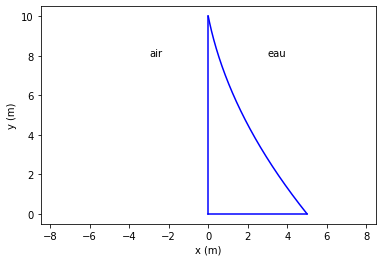

(20.000005, 0.5555554012346109)
T/N>0.5 donc la digue n est pas en équilibre


In [10]:
##Réponse
xe=5.0
xa=0


#on redéfini ici feau et sa dérivée
a=3
def feau(y):
    return a*(y/H)**2-(a+xe)*(y/H)+xe

def feauprime(y):
    return 2*a*y/H**2-(a+xe)/H


def fair(y):
    return (H-y)*xa/H

def fairprime(y):
    return -xa/H

#on fait le calcul
print(calculcomplet(1))
print('T/N>0.5 donc la digue n est pas en équilibre')

f. Reprenons le calcul avec $x_e=6$. La digue est-elle en équilibre ? Comparez avec le cas de la pente affine avec $x_a=0$ et $x_e$=5 ? Laquelle est la plus favorable ?

Volume Intégré  	 25.000004999999973


résumé des forces :
Force eau	 -50000.0 ux	 -35000.0 uy
Poids   	     0.0 ux	 -75000.0 uy
Réaction	 50000.0 ux	 110000.0 uy


résumé des résultats:
Volume	 25.000004999999973
T/N	 0.45455


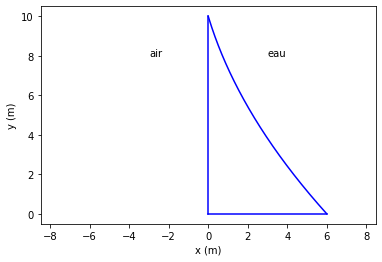

(25.000004999999973, 0.45454535123969325)
La digue est en équilibre !

Dans le cas affine avec x_e=5 nous avions le meme volume mais un rapport T/N plus grand !


In [11]:
##Réponse
xe=6.0
xa=0


#on redéfini ici feau et sa dérivée
a=3
def feau(y):
    return a*(y/H)**2-(a+xe)*(y/H)+xe

def feauprime(y):
    return 2*a*y/H**2-(a+xe)/H


def fair(y):
    return (H-y)*xa/H

def fairprime(y):
    return -xa/H

#on fait le calcul
print(calculcomplet(1))
print('La digue est en équilibre !')
print('\nDans le cas affine avec x_e=5 nous avions le meme volume mais un rapport T/N plus grand !')

g. Utilisez une boucle pour calculer le volume et le rapport $T/N$ pour en faisant varier $x_e$ dans l'intervalle $[5,6]$. On pourra ainsi tracer le rapport $T/N$ en fonction du volume. Déterminez graphiquement le volume minimal pour garder le rapport $T/N$ inférieur à 0.5 dans le cas courbe.

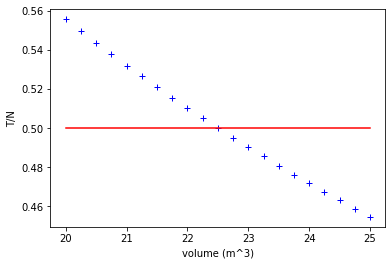

avec une forme concave il suffit d un volume de 22.5m^3 contre 25 avec une forme affine


In [12]:
##Réponse

# on fait varier x_e pour certains x_a fixés

xev=np.arange(5.0,6.05,0.05)

xa=0
#on initialise les listes volumes et rapports
volumes=[]
rapports=[]

#on fait une boucle
for xe in xev:
    vol, rapp=calculcomplet(0)
    volumes.append(vol)
    rapports.append(rapp) 

#on change les listes en array numpy
volumes=np.array(volumes)
rapports=np.array(rapports)

#on affiche le rapport en fonction du volume calculé
plt.plot(volumes,rapports,'+b')
plt.plot(volumes,0.5*np.ones(volumes.shape),'r')
plt.ylabel('T/N') 
plt.xlabel('volume (m^3)')
plt.show()

print('avec une forme concave il suffit d un volume de 22.5m^3 contre 25 avec une forme affine')

h. Expliquez pourquoi la forme courbe de l'interface aide à réduire le volume de béton nécessaire à garder la digue en équilibre.

##Réponse

avec une forme concave la direction de la normale à la surface de contact varie avec la profondeur : elle devient plus verticale quand la profondeur augmente. Donc proche du fond, là où la pression est plus grande, la force est dirigée plus vers le bas ce qui aide à plaquer la digue au sol.

## Parenthèse

Nous avons ici omis la deuxième équation d'équilibre statique : le théorème du moment cinétique (ou équilibre du moment des forces dans le cas statique).

Pour vérifier que la digue ne bascule pas sous la pression de l'eau, il faudrait en effet vérifier que le moment des forces qui s'applique à la digue soit nul.

Pour cela, il faudrait :

- trouver le point d'application du poids (le centre de gravité de la digue),
- calculer le moment du poids par rapport à un point,
- calculer la résultante du moment des forces de pression par rapport au même point,
- trouver le point d'application de la réaction du sol qui annule la somme des moments des forces (par rapport à un point quelconque) 
- vérifier que ce point d'application est bien situé quelque part entre la digue et le sol (sinon la digue bascule...)


